In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
# Sorces
path_project = os.path.join(os.getcwd(),'Prices')
path_prices = os.path.join(path_project,'Stocks_yahoo2')

In [3]:
# df_stocks_list = pd.read_csv(os.path.join('SP500','constituents_csv.csv'), sep=',')

In [12]:
# Get symbols for currency.com
df_stocks_list = pd.read_csv(os.path.join(path_project,'currencycom_info.csv'), sep=';')
df_stocks_list = df_stocks_list[(df_stocks_list['assetType']=='EQUITY')]
df_stocks_list['symbol'] = df_stocks_list['symbol'].str.split('.', n=1, expand=True)
df_stocks_list['symbol'] = df_stocks_list['symbol'].str.replace('[a-z]', '', regex=True)
# df_stocks_list['symbol'] = df_stocks_list['symbol'].str.replace('/', '-', regex=True)
# df_stocks_list = df_stocks_list[(df_stocks_list['marketType']=='SPOT') & (~(df_stocks_list['country']==''))]
df_stocks_list = df_stocks_list.drop_duplicates(subset=['symbol'])
# df_stocks_list = df_stocks_list.set_index('Symbol')
df_stocks_list

,Unnamed: 0,symbol,name,status,baseAsset,baseAssetPrecision,quoteAsset,quoteAssetId,quotePrecision,orderTypes,...,longRate,shortRate,swapChargeInterval,makerFee,takerFee,maxSLGap,minSLGap,maxTPGap,minTPGap,tradingFee
0,0,EVK,Evonik,BREAK,EVK,3,EUR,EUR,3,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MPW,Medical Properties,BREAK,MPW,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,UPS,United Parcel,BREAK,UPS,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,IPO,Renaissance IPO ETF,BREAK,IPOus,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,APH,Amphenol,BREAK,APH,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,1709,PPLT,Aberdeen Standard Physical Platinum Shares ETF,BREAK,PPLT,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710,1710,UPLD,Upland Software Inc.,BREAK,UPLD,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,1711,DSKY,Detskiy Mir,HALT,DSKYru,2,RUB,RUB,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,1712,STLD,Steel Dynamics,BREAK,STLD,2,USD,USD,2,"['LIMIT', 'MARKET']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# get files with folder
list_files = os.listdir(path=path_prices)
filenames = [x for x in list_files if x.endswith('.csv')]
print(len(filenames))

1235


In [14]:
df_sector = df_stocks_list

In [ ]:
df_sector['sector'].unique()

array(['Basic Materials', 'Financials', 'Industrials', nan, 'Energy',
       'Cyclical Consumer Goods & Services', 'Healthcare', 'Technology',
       'Telecommunications Services', 'Utilities',
       'Non-Cyclical Consumer Goods & Services'], dtype=object)

In [ ]:
for sector in df_sector['sector'].unique():
	print(sector)
	if sector is np.NaN:
		continue
	list_symbols_sector = df_sector[df_sector['sector'] == sector]['symbol'].to_list()
	list_symbols = [col for col in df.columns if col in list_symbols_sector]
	print(list_symbols)

Basic Materials
['AA', 'AEM', 'AG', 'AI', 'AMRS', 'APAM', 'APD', 'ARNC', 'ASH', 'AVY', 'AXTA', 'BERY', 'BLL', 'BNR', 'CC', 'CCK', 'CE', 'CF', 'CLF', 'ELD', 'EMN', 'EVK', 'EXP', 'FCX', 'FM', 'FMC', 'FNV', 'HEI', 'HUN', 'IP', 'LYB', 'MLM', 'MOS', 'MT', 'NEM', 'NUE', 'PKG', 'PPG', 'REYN', 'RS', 'SCCO', 'SEE', 'SHW', 'SLCA', 'SMG', 'SQM', 'STLD', 'STVN', 'VALE', 'VIS', 'VMC', 'WLK', 'WPM', 'WRK', 'X']
Financials
['AAME', 'AAXJ', 'ACA', 'ACWI', 'AER', 'AFL', 'AIG', 'AIV', 'AJG', 'ALL', 'ALLY', 'ALV', 'AMG', 'AMH', 'AMP', 'AMT', 'AON', 'ARE', 'ARKQ', 'ARKW', 'ARL', 'ATH', 'AVB', 'AXP', 'AXS', 'BAC', 'BAP', 'BBD', 'BBVA', 'BEN', 'BHG', 'BITO', 'BJK', 'BK', 'BLK', 'BMO', 'BNS', 'BRX', 'BX', 'BXP', 'C', 'CB', 'CBOE', 'CCI', 'CFG', 'CFR', 'CM', 'CMA', 'CME', 'COF', 'CONE', 'CPT', 'DFS', 'DLR', 'DRE', 'EEM', 'EFA', 'EOS', 'EQIX', 'EQR', 'ESS', 'EVR', 'EWD', 'EWM', 'EWT', 'EXR', 'EZA', 'EZU', 'FAN', 'FANH', 'FDN', 'FHN', 'FIS', 'FITB', 'FLOW', 'FNF', 'FPX', 'FPXI', 'FRC', 'FRHC', 'FRT', 'G', 'GLD'

In [15]:
data = []
for filename in filenames:
    label = filename.split(sep='.')[0] 
    if label.upper() in df_sector['symbol'].to_list():
        df = pd.read_csv(os.path.join(path_prices,filename), sep=',', usecols=['Date','Close'])
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.columns = [label]
        data.append(df)

df = pd.concat(data, sort=True, axis=1)

In [22]:
df2 = df.iloc[-1]
df2[df2.isnull()==True]

ACS     NaN
AD      NaN
ALM     NaN
AMGO    NaN
AMOV    NaN
       ... 
WAF     NaN
WLTW    NaN
XLNX    NaN
YNDX    NaN
ZAL     NaN
Name: 2022-03-04 00:00:00, Length: 96, dtype: object

In [21]:
# delete last row
df.drop(df.tail(1).index, inplace=True)

In [23]:
df_symbol_nan = df2[df2.isnull()==True]
list_symbol_nan = df_symbol_nan.reset_index()['index'].to_list()
df = df[df.columns.difference(list_symbol_nan)]

In [27]:
df

,A,AA,AAL,AAME,AAP,AAPL,AAXJ,ABBV,ABC,ABCL,...,ZI,ZION,ZIP,ZLAB,ZM,ZNGA,ZNTL,ZS,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,7.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,7.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,7.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,6.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,6.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,130.36,75.34,17.25,2.45,204.48,165.12,78.62,147.77,142.53,8.71,...,54.69,70.89,19.98,54.70,132.60,9.08,49.89,239.15,29.44,193.65
2022-03-01,131.93,79.78,16.29,2.55,201.17,163.20,77.91,147.69,141.97,9.04,...,55.57,64.94,19.31,52.55,122.78,9.00,50.41,247.83,29.58,192.54
2022-03-02,133.16,82.56,16.37,2.52,209.07,166.56,78.03,149.57,143.00,9.43,...,55.08,68.38,21.53,52.53,121.61,9.12,49.85,254.41,28.97,196.07


In [24]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import pulp
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [25]:
import cvxpy as cp

In [26]:
import time
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [27]:
portfolio_val = 5000

In [28]:
def calc_ef(df_time, list_return):
	global dfs, dfe
	try:
		mu = expected_returns.mean_historical_return(df_time)
		S = risk_models.sample_cov(df_time)
		ef = EfficientFrontier(mu, S)

		weight = ef.max_sharpe()
		cleaned_weight = ef.clean_weights()
		ear_v_sharpe = ef.portfolio_performance()
		latest_prices = get_latest_prices(df_time)
		da = DiscreteAllocation(cleaned_weight, latest_prices, total_portfolio_value=portfolio_val)
		allocation, leftover = da.lp_portfolio(solver=cp.ECOS_BB)

	except ValueError as e:
		print(e)
		return 0

	if 'ear_v_sharpe' in locals():
		list_return.extend([round(elem, 2) for elem in ear_v_sharpe])
		dfe.append(list_return)
		# transform information for google sheet
		df_portfolio = pd.DataFrame(allocation.items(), columns=['Symbol', 'Quantity']).set_index('Symbol')
		df_last_price = latest_prices.to_frame(name='Price')
		df_pay = pd.merge(df_portfolio, df_last_price, how="left", left_index=True, right_index=True)
		df_pay['Date'] = df_time.index.max().strftime('%d.%m.%Y')
		df_pay['Sector'] = sector
		df_pay = df_pay.reset_index()
		dfs.append(df_pay[['Symbol', 'Sector', 'Date', 'Price', 'Quantity']])


In [8]:
import datetime as DT

start_date = DT.datetime(2022, 1, 1)
end_date = DT.datetime(2022, 3, 1)

high_market = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date), freq="M"
).strftime('%Y-%m-%d').tolist()
high_market

In [ ]:
# files name for result
files_evs = r'evs.csv'
files_stocks = r'stocks.csv'

In [30]:
# high_market = ['2022-03-04']

for cut_date in high_market:

	dfs = []
	dfe = []
	for sector in df_sector['sector'].unique():
		if (sector is np.NaN):
			continue
		list_return = [cut_date, sector]
		print(list_return)

		list_symbols_sector = df_sector[df_sector['sector'] == sector]['symbol'].to_list()
		list_symbols = [col for col in df.columns if col in list_symbols_sector]
		df_time = df[:cut_date][list_symbols]

		# Removing columns whose last date is Nan
		df2 = df_time.iloc[-1]
		df_symbol_nan = df2[df2.isnull()==True]
		list_symbol_nan = df_symbol_nan.reset_index()['index'].to_list()
		df_time = df_time[df_time.columns.difference(list_symbol_nan)]

		try:
			calc_ef(df_time, list_return)
		except ValueError as e:
			print(e)
			continue
	
	dfs_result = pd.concat(dfs)
	dfe_result = pd.DataFrame(dfe, columns =['Date', 'sector', 'ear', 'volatility', 'sharpe']) 
	dfs_result.to_csv(files_stocks,  mode='a', header=False, sep=';', decimal=',', index=False)
	dfe_result.to_csv(files_evs, mode='a', header=False, sep=';', decimal=',', index=True)

['2022-03-04', 'Basic Materials']
['2022-03-04', 'Financials']
['2022-03-04', 'Industrials']
['2022-03-04', 'Energy']
['2022-03-04', 'Cyclical Consumer Goods & Services']
['2022-03-04', 'Healthcare']
['2022-03-04', 'Technology']
['2022-03-04', 'Telecommunications Services']
['2022-03-04', 'Utilities']
['2022-03-04', 'Non-Cyclical Consumer Goods & Services']


In [31]:
dfe_result

,Date,sector,ear,volatility,sharpe
0,2022-03-04,Basic Materials,0.62,0.39,1.53
1,2022-03-04,Financials,0.50,0.15,3.14
2,2022-03-04,Industrials,0.28,0.23,1.10
3,2022-03-04,Energy,0.37,0.48,0.74
4,2022-03-04,Cyclical Consumer Goods & Services,0.28,0.19,1.39
5,2022-03-04,Healthcare,0.54,0.31,1.70
6,2022-03-04,Technology,0.84,0.44,1.87
7,2022-03-04,Telecommunications Services,0.11,0.30,0.30
8,2022-03-04,Utilities,0.16,0.23,0.62
9,2022-03-04,Non-Cyclical Consumer Goods & Services,0.15,0.16,0.77


In [32]:
dfs_result

,Symbol,Sector,Date,Price,Quantity
0,AMRS,Basic Materials,04.03.2022,4.60,2
1,ARNC,Basic Materials,04.03.2022,27.10,97
2,EVK,Basic Materials,04.03.2022,1.55,10
3,FNV,Basic Materials,04.03.2022,158.24,8
4,SHW,Basic Materials,04.03.2022,258.49,4
...,...,...,...,...,...
10,HSY,Non-Cyclical Consumer Goods & Services,04.03.2022,212.82,5
11,OTLY,Non-Cyclical Consumer Goods & Services,04.03.2022,6.18,1
12,POST,Non-Cyclical Consumer Goods & Services,04.03.2022,103.47,4
13,SAFM,Non-Cyclical Consumer Goods & Services,04.03.2022,179.51,1


In [11]:
files_stocks = 'all_stocks.csv'
df.to_csv(files_stocks, sep=';', decimal=',')

In [15]:
files_stocks = 'all_stocks.csv'
df = pd.read_csv(files_stocks, sep=';', decimal=',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [16]:
portfolioopt_list = 'portfolioopt_list.csv'
portfolioopt_list = 'stocks_port.csv'
df_port_list = pd.read_csv(portfolioopt_list, sep=';', decimal=',')

In [17]:
df_port_list

,Symbol,V
0,ABBV,1
1,ARNC,10
2,BILL,1
3,BNTX,1
4,CHD,1
5,CHTR,1
6,CNC,1
7,DG,1
8,FERG,1
9,FRHC,7


In [18]:
list_portfolio = df_port_list['Symbol'].to_list()

In [29]:
high_market = ['2022-02-24']

for cut_date in high_market:

	list_symbols = list_portfolio
	df_time = df[:cut_date][list_symbols]

	df2 = df_time.iloc[-1]
	df_symbol_nan = df2[df2.isnull()==True]
	list_symbol_nan = df_symbol_nan.reset_index()['index'].to_list()
	df_time = df_time[df_time.columns.difference(list_symbol_nan)]

	try:
		mu = expected_returns.mean_historical_return(df_time)
		S = risk_models.sample_cov(df_time)
		ef = EfficientFrontier(mu, S)
		weight = ef.max_sharpe()
		cleaned_weight = ef.clean_weights()
		ear_v_sharpe = ef.portfolio_performance() #verbose=True
		latest_prices = get_latest_prices(df_time)
		da = DiscreteAllocation(cleaned_weight, latest_prices, total_portfolio_value=portfolio_val)
		allocation, leftover = da.lp_portfolio()
	except ValueError as e:
		print(e)

	# transform information for google sheet
	df_portfolio = pd.DataFrame(allocation.items(), columns=['Symbol', 'Quantity']).set_index('Symbol')
	df_last_price = latest_prices.to_frame(name='Price')
	df_pay = pd.merge(df_portfolio, df_last_price, how="left", left_index=True, right_index=True)
	df_pay['Date'] = df_time.index.max()
	
	files_stocks = r'stocks_port2.csv'
	df_pay.to_csv(files_stocks,  mode='a', header=False, sep=';', decimal=',', index=False)

In [20]:
df_portfolio.reset_index().to_csv(files_stocks,  mode='a', header=False, sep=';', decimal=',', index=False)

In [30]:
df_time

,ABBV,ARNC,BILL,BNTX,CHD,CHTR,CNC,DG,FERG,FRHC,...,JDST,KMB,NET,ROSN,RYAN,SI,SPXU,TLT,UPST,UVXY
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,144.97,32.47,232.04,157.36,96.95,597.83,82.81,197.12,150.66,62.26,...,9.34,131.63,103.81,NaN,39.29,119.10,15.41,136.79,139.63,16.42
2022-02-18,144.03,32.28,224.23,156.94,98.78,596.83,82.06,199.97,152.11,63.36,...,9.64,133.15,95.87,NaN,38.49,114.86,15.75,138.23,130.05,17.01
2022-02-22,145.56,31.33,222.53,149.89,96.72,595.50,81.33,191.94,150.87,62.43,...,9.93,132.85,94.73,0.84,38.45,110.84,16.22,138.59,120.51,16.82


In [36]:
mu = expected_returns.mean_historical_return(df_time)
S = risk_models.sample_cov(df_time)
ef = EfficientFrontier(mu, S)

In [33]:
import matplotlib.pyplot as plt

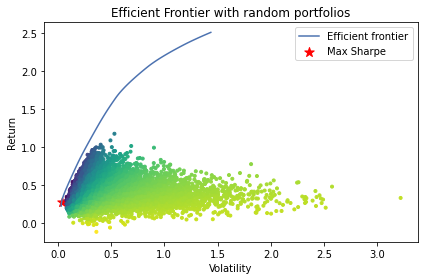

In [35]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

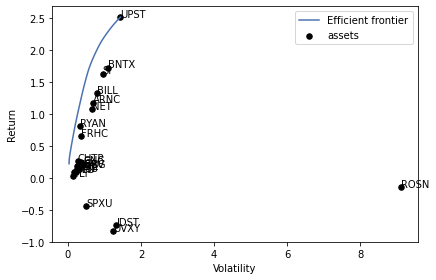

In [37]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
for i, txt in enumerate(ef.tickers):
	ax.annotate(txt, ((np.diag(ef.cov_matrix)**(1/2))[i], ef.expected_returns[i]))